## Assignment2 - Supervised Learning flow

### Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [549]:
# student 1: Oren Ilutowich 318901303
# student 2: Roee Bloch 318846722   
# student 3: Daniel Vasserman 325698934
# student 4: Gil Harary 209185230
# (optional) student 5:
# (optional) student 6:

## Part 2 - Experiments
You could add as many code cells as needed

In [550]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [551]:
#load the two datasets
test_df = pd.read_csv("titanic_test.csv")
train_df = pd.read_csv("titanic_train.csv")

In [552]:
print("Test dataset:")
test_df.head()

Test dataset:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


In [553]:
print("Train dataset:")
train_df.head()

Train dataset:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


#### EDA

In [554]:
test_df.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,2.363128,0.675978,30.366983,0.502793,0.368715,31.507239,0.351955,0.340782
std,0.812116,0.469321,12.246691,1.278053,0.819923,49.254330,0.639640,0.475302
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,24.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,12.000000,0.000000,0.000000
75%,3.000000,1.000000,36.000000,1.000000,0.000000,27.825000,1.000000,1.000000
max,3.000000,1.000000,71.000000,8.000000,5.000000,263.000000,3.000000,1.000000


In [555]:
# Checking null values and Dtypes
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    179 non-null    int64  
 1   Sex       179 non-null    int64  
 2   Age       179 non-null    float64
 3   SibSp     179 non-null    int64  
 4   Parch     179 non-null    int64  
 5   Fare      179 non-null    float64
 6   Embarked  179 non-null    int64  
 7   Survived  179 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 11.3 KB


In [556]:
# Showing a cross tabulation to show how many survived from each port of embarkation
pd.crosstab(test_df['Embarked'],test_df['Survived'])

Survived,0,1
Embarked,,
0,94,37
1,17,17
2,7,6
3,0,1


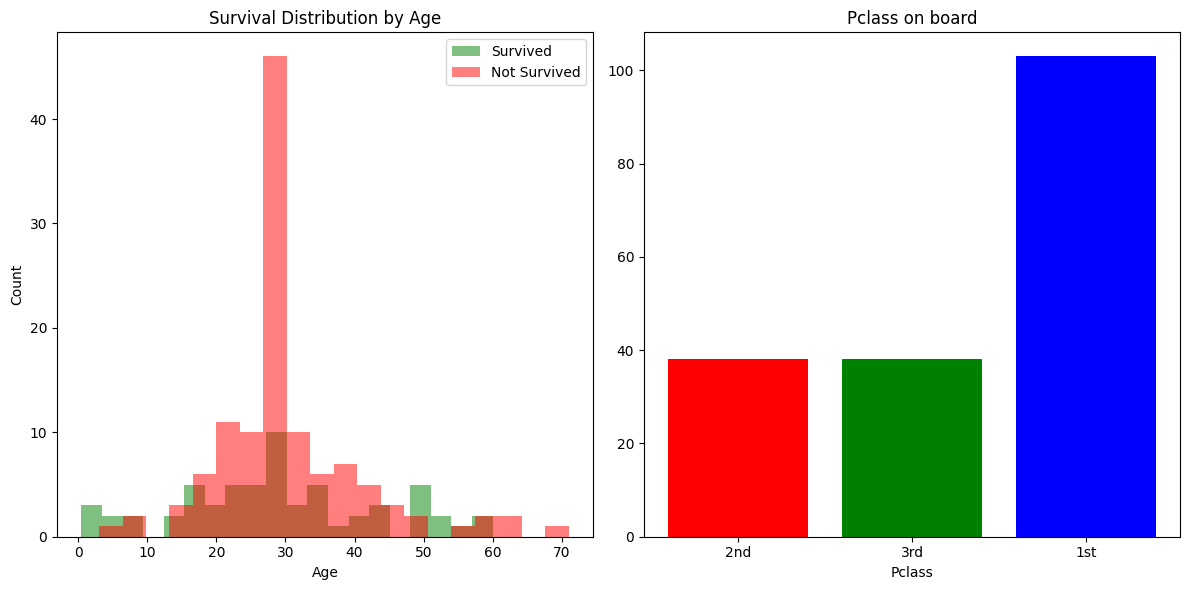

In [557]:
import matplotlib.pyplot as plt

# Extract rows into two sets where column "Survived" is 1 (survived) and 0 (not survived)
survived_data = test_df[test_df['Survived'] == 1]
not_survived_data = test_df[test_df['Survived'] == 0]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Add first plot of the survival distribution by age
axes[0].hist(survived_data['Age'], bins=20, color='green', alpha=0.5, label='Survived')
axes[0].hist(not_survived_data['Age'], bins=20, color='red', alpha=0.5, label='Not Survived')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].set_title('Survival Distribution by Age')
axes[0].legend()

# Add another plot for Pclass on board as a bar plot
survival_counts = test_df['Pclass'].value_counts()
axes[1].bar(survival_counts.index, survival_counts.values, color=['blue', 'red', 'green'])
axes[1].set_title('Pclass on board')
axes[1].set_xlabel('Pclass')
axes[1].set_xticks(survival_counts.index)
axes[1].set_xticklabels(['1st', '2nd', '3rd'])

plt.tight_layout()
plt.show()


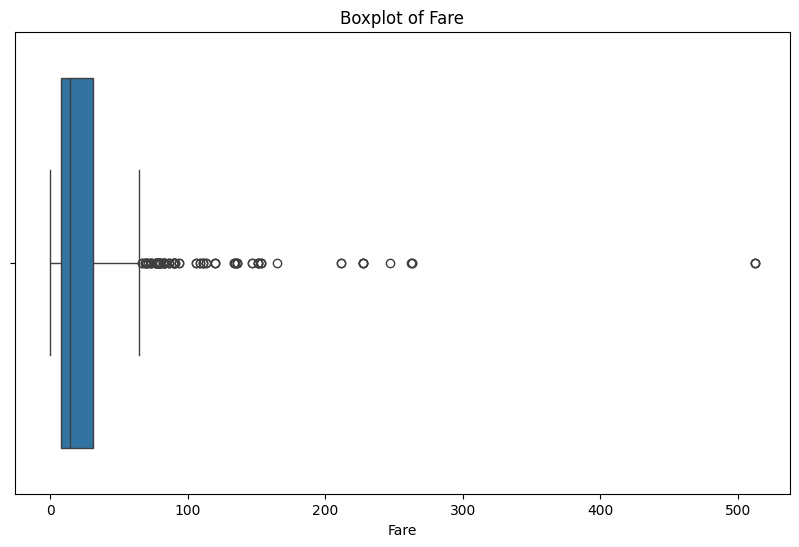

In [558]:
# Checking outliers for Fare using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['Fare'])
plt.title('Boxplot of Fare')
plt.xlabel('Fare')
plt.show()

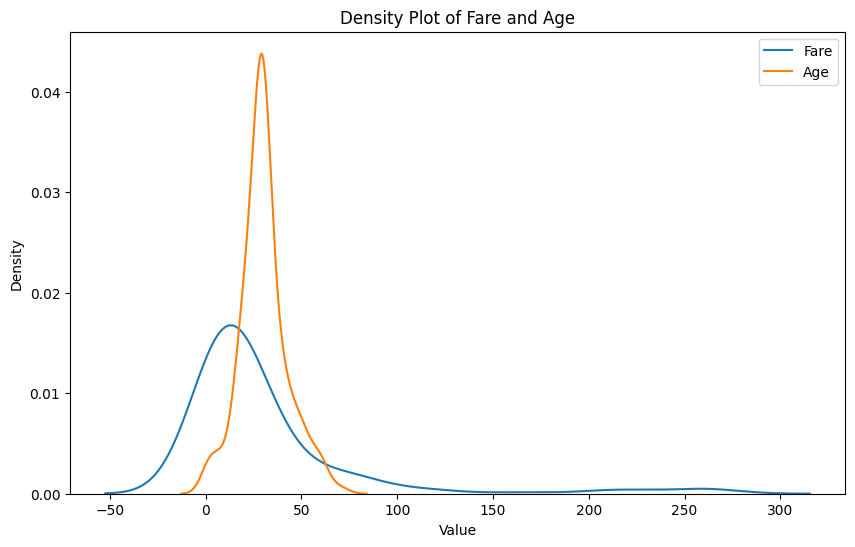

In [559]:
'''We are using this plot to show the data before scaling'''

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the KDE for Fare
sns.kdeplot(test_df['Fare'], ax=ax, label='Fare')

# Plot the KDE for Age
sns.kdeplot(test_df['Age'], ax=ax, label='Age')

ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.set_title('Density Plot of Fare and Age')
ax.legend()
plt.show()

#### Feature Engineering

In [560]:
'''From the boxplot above we identified that there are outliers that their fare was over 200.
We have decided to ignore the other outliers since they are passengers from high price classes'''

# Removing outlier
# train dataframe
train_df = train_df[train_df['Fare'] <= 200]

# train dataframe
test_df = test_df[test_df['Fare'] <= 200]


In [561]:
# Removing duplicated passengers instances
# train dataframe
train_df.drop_duplicates(inplace=True)

# test dataframe
test_df.drop_duplicates(inplace=True)

In [562]:
# Combining SibSp and Parch into one 'FamilySize' column
# train dataframe
train_df['SibSp'] = train_df['SibSp'] + train_df['Parch'] + 1  # +1 for the person himself
train_df.rename(columns={'SibSp': 'FamilySize'}, inplace=True)
train_df.drop(columns=['Parch'], inplace=True)

#test dataframe
test_df['SibSp'] = test_df['SibSp'] + test_df['Parch'] + 1  # +1 for the person himself
test_df.rename(columns={'SibSp': 'FamilySize'}, inplace=True)
test_df.drop(columns=['Parch'], inplace=True)

In [563]:
# In the column 'Embarked' the value 3 appears only once, so replace it  
# train dataframe
most_frequent_value = train_df['Embarked'].mode()[0]
train_df['Embarked'] = train_df['Embarked'].replace(3, most_frequent_value)

# test dataframe
most_frequent_value = test_df['Embarked'].mode()[0]
test_df['Embarked'] = test_df['Embarked'].replace(3, most_frequent_value)

In [564]:
# Bin the age column
# train dataframe
train_df['Age'] = pd.cut(train_df['Age'], bins=[0, 12, 18, 60, 80], labels=False, right=False)

# test dataframe
test_df['Age'] = pd.cut(test_df['Age'], bins=[0, 12, 18, 60, 80], labels=False, right=False)

## Part 3 - Training flow
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

## Part 4 - Apply on test and show model performance estimation